Apply PCA and Clustering to Wholesale Customer Data
In this homework, we'll examine the Wholesale Customers Dataset, which we'll get from the UCI Machine Learning Datasets repository. This dataset contains the purchase records from clients of a wholesale distributor. It details the total annual purchases across categories seen in the data dictionary below:

Category	Description
CHANNEL |1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)| REGION |Geographic region of Portugal for each order (Nominal)| FRESH |Annual spending (m.u.) on fresh products (Continuous);| MILK |Annual spending (m.u.) on milk products (Continuous);| GROCERY |Annual spending (m.u.)on grocery products (Continuous);| FROZEN |Annual spending (m.u.)on frozen products (Continuous)| DETERGENTS_PAPER |Annual spending (m.u.) on detergents and paper products (Continuous)| DELICATESSEN |Annual spending (m.u.)on and delicatessen products (Continuous);|

TASK:

Read in wholesale_customers_data.csv from the datasets folder and store in a dataframe.
Store the Channel column in a separate variable, and then drop the Channel and Region columns from the dataframe.
Scale the data and use PCA to engineer new features (Principal Components).
Print out the explained variance for each principal component.
K-Means, but Without All the Supervision
Challenge: Use K-Means clustering on the wholesale_customers dataset, and then again on a version of this dataset transformed by PCA.

√ Read in the data from the wholesale_customers_data.csv file contained within the datasets folder.
√ Store the Channel column in a separate variable, and then drop the Region and Channel columns from the dataframe.
Channel will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.
Scale the data, fit a k-means object to it, and then visualize the data and the clustering.
Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.
Challenge: Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were. Which did better--scaled data, or data transformed by PCA?

# PCA:

In [16]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

# GET DATA
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
# Store channel column

target = df.Channel

del df['Channel']
del df['Region']

In [11]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [14]:
# SCALE DATA
# PCA TO GET NEW FEATURES

standard_scaler = preprocessing.StandardScaler()
X_ss = standard_scaler.fit_transform(df)
print(X_ss)

[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]


In [17]:
pca = PCA(n_components=6)
X_r = pca.fit_transform(X_ss)

In [18]:
# PCA EXPLAINED VARIANCE 

print(pca.explained_variance_)

[3.10707136 1.79404441 1.0140786  0.74007428 0.55790035 0.46035462]


# K Means: 
fit k means to above data

In [30]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [45]:
# SUM THE SQUARED DISTANCES
# SCIKIT LEARN CLUSTER

sum_sqr_dist = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_ss)
    sum_sqr_dist.append(km.inertia_)

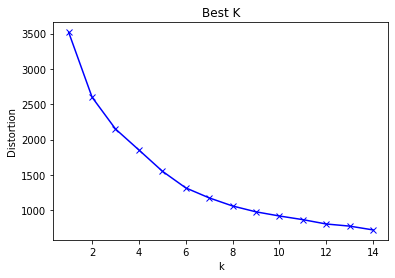

In [46]:
# ELBOW PLOT GRAPH

plt.plot(K, sum_sqr_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Best K')
plt.show()

In [47]:
# FIT K MEANS CLUSTERS

km = KMeans(n_clusters=6)
km.fit(X_ss)
print(km.cluster_centers_)

[[-5.90811099e-01 -1.58939862e+00 -1.17369902e-01 -3.50992288e-01
  -4.02741180e-01  1.33513200e-02 -4.22747572e-01 -1.62015752e-01]
 [-5.50800431e-01  3.09580198e-01  1.86860622e+00 -1.26905907e-01
  -2.56963592e-01  1.42079094e+00 -4.18345174e-01  4.02778334e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [ 1.44865163e+00  1.66562579e-01 -3.35427763e-01  4.58126517e-01
   6.73224816e-01 -3.49684911e-01  6.89164252e-01  4.76614618e-02]
 [-6.90297086e-01  5.90668285e-01 -2.26969330e-01 -3.81612608e-01
  -4.75234627e-01 -1.72435121e-01 -4.42861386e-01 -1.86419955e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]]


In [48]:
# PREDICT

y_pred = km.predict(X_ss) +1

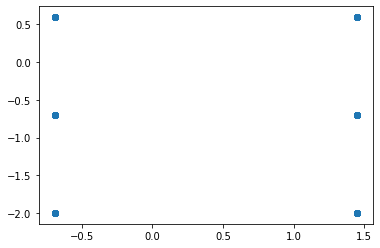

In [49]:
# PLOTTING

plt.scatter(X_ss[:, 0], X_ss[:, 1])

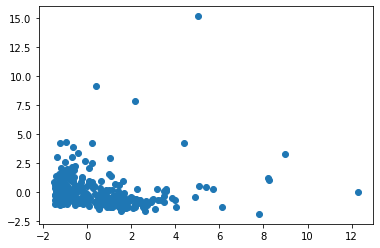

In [51]:
# USING PCA

km = KMeans(n_clusters=6)
km.fit(X_r)
y_pred = km.predict(X_r) +1
plt.scatter(X_r[:, 0], X_r[:, 1])